<a href="https://colab.research.google.com/github/harini9804/big-data-assignment/blob/master/Big_Data_Assignment_descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset obtained from: https://plants.sc.egov.usda.gov/java/stateDownload?statefips=US04

Available in the file 'data.txt'

In [0]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# --- #
# used in Theils' U 
from collections import Counter
import math
import scipy.stats as ss
import scipy.cluster.hierarchy as sch

# Descriptive Analytics
Let's read the file and take a look:

In [0]:
data = pd.read_csv('data.txt')
data.head()

,Symbol,Synonym Symbol,Scientific Name with Author,National Common Name,Family
0,ANISA,NaN,Anisacanthus Nees,desert honeysuckle,Acanthaceae
1,ANTH2,NaN,Anisacanthus thurberi (Torr.) A. Gray,Thurber's desert honeysuckle,Acanthaceae
2,ANTH2,DRTH3,Drejera thurberi Torr.,NaN,Acanthaceae
3,CAAR7,NaN,Carlowrightia arizonica A. Gray,Arizona wrightwort,Acanthaceae
4,CALI2,NaN,Carlowrightia linearifolia (Torr.) A. Gray,heath wrightwort,Acanthaceae



Let's take a look at attribute types and number of non null values

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16424 entries, 0 to 16423
Data columns (total 5 columns):
Symbol                         16424 non-null object
Synonym Symbol                 9595 non-null object
Scientific Name with Author    16424 non-null object
National Common Name           6816 non-null object
Family                         16424 non-null object
dtypes: object(5)
memory usage: 641.7+ KB


Now let's look at the number of categories in an attribute and the number of records in each:

In [0]:
data.columns

Index(['Symbol', 'Synonym Symbol', 'Scientific Name with Author',
       'National Common Name', 'Family'],
      dtype='object')

In [0]:
data['Symbol'].value_counts()

MIGU      70
DECE      46
CRSU5     44
DOVI      36
MACAC3    34
          ..
RATR       1
TETRA      1
BOUVA      1
ERCE2      1
VACCA      1
Name: Symbol, Length: 6829, dtype: int64

In [0]:
data['Synonym Symbol'].value_counts()

POVUH     1
LEDET     1
PEOP3     1
CRDOR2    1
EUAL5     1
         ..
MUWO      1
COVII     1
TRCOA     1
GEBA6     1
PHSE8     1
Name: Synonym Symbol, Length: 9595, dtype: int64

In [0]:
data['Scientific Name with Author'].value_counts()

Strombocarpa odorata A. Gray                                                   1
Torulinium confertum Desv. ex Ham.                                             1
Agrostis elliottiana Schult.                                                   1
Cenchrus carolinianus Walter, nom. utique rej.                                 1
Arceuthobium microcarpum (Engelm.) Hawksw. & Wiens                             1
                                                                              ..
Gaura gracilis Wooton & Standl. var. typica Munz                               1
Potamogeton foliosus Raf. ssp. foliosus                                        1
Plantago hirtella Kunth var. mollior Pilg.                                     1
Lantana horrida Kunth var. latibracteata Moldenke                              1
Opuntia occidentalis Engelm. & J.M. Bigelow var. megacarpa (Griffiths) Munz    1
Name: Scientific Name with Author, Length: 16424, dtype: int64

In [0]:
data['National Common Name'].value_counts()

rubber rabbitbrush          13
freckled milkvetch           9
yellow rabbitbrush           8
hoary tansyaster             7
groundcover milkvetch        7
                            ..
sycamore muhly               1
sweetjuice                   1
muhly                        1
wild dwarf morning-glory     1
manyflower stickseed         1
Name: National Common Name, Length: 5348, dtype: int64

In [0]:
data['Family'].value_counts()

Asteraceae          2596
Poaceae             1934
Fabaceae            1277
Brassicaceae         577
Scrophulariaceae     518
                    ... 
Lecanoraceae           1
Acarosporaceae         1
Teloschistaceae        1
Cladoniaceae           1
Hymeneliaceae          1
Name: Family, Length: 169, dtype: int64

# Data preprocessing
Now splitting the 'Scientific Name with Author' column into two - 'Scientific Name' and 'Author', assuming that the first two words are part of the 'Scientific Name'

In [0]:
 data['Scientific Name with Author']

0                                 Anisacanthus Nees
1             Anisacanthus thurberi (Torr.) A. Gray
2                            Drejera thurberi Torr.
3                   Carlowrightia arizonica A. Gray
4        Carlowrightia linearifolia (Torr.) A. Gray
                            ...                    
16419                        Larrea mexicana Moric.
16420                                    Peganum L.
16421                            Peganum harmala L.
16422                                   Tribulus L.
16423                        Tribulus terrestris L.
Name: Scientific Name with Author, Length: 16424, dtype: object

In [0]:
data_spl = data['Scientific Name with Author'].str.split()
data_spl

0                                    [Anisacanthus, Nees]
1             [Anisacanthus, thurberi, (Torr.), A., Gray]
2                              [Drejera, thurberi, Torr.]
3                    [Carlowrightia, arizonica, A., Gray]
4        [Carlowrightia, linearifolia, (Torr.), A., Gray]
                               ...                       
16419                          [Larrea, mexicana, Moric.]
16420                                       [Peganum, L.]
16421                              [Peganum, harmala, L.]
16422                                      [Tribulus, L.]
16423                          [Tribulus, terrestris, L.]
Name: Scientific Name with Author, Length: 16424, dtype: object

In [0]:
data['Scientific Name'] = data_spl.str[0]+" "+data_spl.str[1]
data['Scientific Name']

0                 Anisacanthus Nees
1             Anisacanthus thurberi
2                  Drejera thurberi
3           Carlowrightia arizonica
4        Carlowrightia linearifolia
                    ...            
16419               Larrea mexicana
16420                    Peganum L.
16421               Peganum harmala
16422                   Tribulus L.
16423           Tribulus terrestris
Name: Scientific Name, Length: 16424, dtype: object

In [0]:
data_spl.str[2:]


0                         []
1        [(Torr.), A., Gray]
2                    [Torr.]
3                 [A., Gray]
4        [(Torr.), A., Gray]
                ...         
16419               [Moric.]
16420                     []
16421                   [L.]
16422                     []
16423                   [L.]
Name: Scientific Name with Author, Length: 16424, dtype: object

In [0]:
data['Author'] = data_spl.str[2:].str.join(' ')
data['Author']

0                       
1        (Torr.) A. Gray
2                  Torr.
3                A. Gray
4        (Torr.) A. Gray
              ...       
16419             Moric.
16420                   
16421                 L.
16422                   
16423                 L.
Name: Author, Length: 16424, dtype: object

In [0]:
data.drop('Scientific Name with Author',axis=1,inplace=True)

In [0]:
data_copy = data

Now label encoding

In [0]:
data = data_copy

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16424 entries, 0 to 16423
Data columns (total 6 columns):
Symbol                  16424 non-null object
Synonym Symbol          9595 non-null object
National Common Name    6816 non-null object
Family                  16424 non-null object
Scientific Name         16424 non-null object
Author                  16424 non-null object
dtypes: object(6)
memory usage: 770.0+ KB


# Integer Encoding

In [0]:
x = list(data['Symbol'].unique())

dict_ = {}
for index, ele in enumerate(x):
  dict_.update({ele:index})

data['Symbol'] = data['Symbol'].map(dict_)

In [0]:
x = list(data['Synonym Symbol'].unique())
del x[0]

dict_ = {}
for index, ele in enumerate(x):
  dict_.update({ele:index})

data['Synonym Symbol'] = data['Synonym Symbol'].map(dict_)

In [0]:
x = list(data['National Common Name'].unique())
x[2]

nan

In [0]:
x = list(data['National Common Name'].unique())
del x[2]

dict_ = {}
for index, ele in enumerate(x):
  dict_.update({ele:index})

data['National Common Name'] = data['National Common Name'].map(dict_)

In [0]:
x = list(data['Family'].unique())

dict_ = {}
for index, ele in enumerate(x):
  dict_.update({ele:index})

data['Family'] = data['Family'].map(dict_)

In [0]:
x = list(data['Author'].unique())
ind = x.index('')


In [0]:
x = list(data['Author'].unique())
ind = x.index('')
del x[ind]
dict_ = {}
for index, ele in enumerate(x):
  dict_.update({ele:index})

data['Author'] = data['Author'].map(dict_)

In [0]:
x = list(data['Scientific Name'].unique())

dict_ = {}
for index, ele in enumerate(x):
  dict_.update({ele:index})

data['Scientific Name'] = data['Scientific Name'].map(dict_)

In [0]:
data.head()

,Symbol,Synonym Symbol,National Common Name,Family,Scientific Name,Author
0,0,NaN,0.0,0,0,NaN
1,1,NaN,1.0,0,1,0.0
2,1,0.0,NaN,0,2,1.0
3,2,NaN,2.0,0,3,2.0
4,3,NaN,3.0,0,4,0.0


https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16424 entries, 0 to 16423
Data columns (total 6 columns):
Symbol                  16424 non-null int64
Synonym Symbol          9595 non-null float64
National Common Name    6816 non-null float64
Family                  16424 non-null int64
Scientific Name         16424 non-null int64
Author                  15556 non-null float64
dtypes: float64(3), int64(3)
memory usage: 770.0 KB


Now let us analyse the proportion of missing values in each category:

In [0]:
for each in data.columns:
  print(each, data[each].isnull().sum())

Symbol 0
Synonym Symbol 6829
National Common Name 9608
Family 0
Scientific Name 0
Author 868


In [0]:
data_copy_2 = data

# Data Imputation

In [0]:
data.columns

Index(['Symbol', 'Synonym Symbol', 'National Common Name', 'Family',
       'Scientific Name', 'Author'],
      dtype='object')

Reordering the columns such that the target variable is in the end:

In [0]:
data_columns =['Symbol', 'Synonym Symbol', 'National Common Name', 
       'Scientific Name', 'Author', 'Family']
data = data[data_columns]
data.head()

,Symbol,Synonym Symbol,National Common Name,Scientific Name,Author,Family
0,0,NaN,0.0,0,NaN,0
1,1,NaN,1.0,1,0.0,0
2,1,0.0,NaN,2,1.0,0
3,2,NaN,2.0,3,2.0,0
4,3,NaN,3.0,4,0.0,0


Now to impute the data to fill in missing values, in this case it is not appropriate to go for techniques like mean, medium substitution since we are dealing with categorical values. 
Thereby, we can opt for KNN imputation.

In [0]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(data))
round(imputed_data)

imputed_data.columns = data.columns
imputed_data.index = data.index

imputed_data.head()

,Symbol,Synonym Symbol,National Common Name,Scientific Name,Author,Family
0,0.0,2.0,0.0,0.0,0.8,0.0
1,1.0,2.0,1.0,1.0,0.0,0.0
2,1.0,0.0,2.0,2.0,1.0,0.0
3,2.0,2.0,2.0,3.0,2.0,0.0
4,3.0,2.4,3.0,4.0,0.0,0.0


KNN Imputation takes the mean of the nearest neighbours, hence as seen in the first and last rows, there are decimal values.
Hence we know round off all numbers to the nearest integer

In [0]:
def roundoff_dataset(data):

  col = ['Symbol', 'Synonym Symbol', 'National Common Name', 'Author','Scientific Name', 'Family']

  for index,value in enumerate(col):
    list_ = []
    for j in data[value]:
      list_.append(round(j))
    
    x = {value:list_}
    if index == 0:
      df = pd.DataFrame(x)
    else:
      df[value] = pd.DataFrame(x)

  return df

In [0]:
imputed_data = roundoff_dataset(imputed_data)

Now we observe that all missing values have been filled.

In [0]:
imputed_data.isnull().sum()

Symbol                  0
Synonym Symbol          0
National Common Name    0
Author                  0
Scientific Name         0
Family                  0
dtype: int64

# Feature Selection


---
Now we can move on to finding the correlation between features. We cannot use the 'usual' method (Pearson's) for computing this correlation here since we are dealing with categorical values.
* One option we have is Cramer's V method, where the output ranges from 0 to 1 [0,1]. However, this is symmetric. Say f represents the Cramer's V function, then, f(x,y) = f(y,x).
This may not be an accurate description of the data since one feature may depend on another but the reverse need not be true.
* Thus, a suitable alternative is Theil's U - also called the uncertainty coefficient. Unlike Cramer's V, it is asymmetric, ie, U(x,y) ≠ U(y,x). It looks at how many possible states 'y' has, given the value of 'x' - and the frequency of occurrence. 





In [0]:
REPLACE = 'replace'
DROP = 'drop'
DROP_SAMPLES = 'drop_samples'
DROP_FEATURES = 'drop_features'
SKIP = 'skip'
DEFAULT_REPLACE_VALUE = 0.0

In [0]:
def conditional_entropy(x,y,nan_strategy=REPLACE,nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    **Returns:** float
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

In [0]:
def theils_u(x, y, nan_strategy=REPLACE, nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-
    categorical association. This is the uncertainty of x given y: value is
    on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [0]:
def replace_nan_with_value(x, y, value):
    x = [v if v == v and v is not None else value for v in x]  # NaN != NaN
    y = [v if v == v and v is not None else value for v in y]
    return x, y

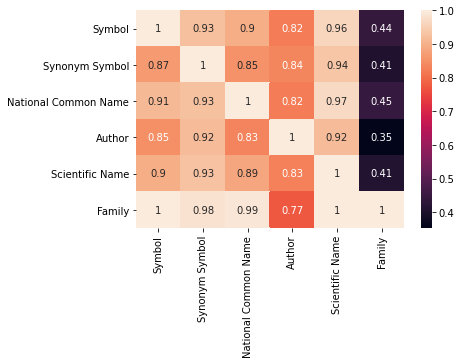

In [0]:
list_2 = []
matrix_2 = []

for i in imputed_data.columns:
  for j in imputed_data.columns:

    a = imputed_data[i]
    b = imputed_data[j]

    result_2 = theils_u(a,b)

    list_2.append(result_2)
  
matrix_2.append(list_2)

theils_u_matrix_2 = np.reshape(matrix_2[0], (6,6))
sns.heatmap(theils_u_matrix_2, xticklabels=imputed_data.columns, yticklabels=imputed_data.columns, annot=True)

Strongly correlated features are more linearly dependent, and hence have similar effect on the target variable. Hence we can retain one while dropping the other. For this we can choose the threshold to be 0.9 .

In [0]:
columns = np.full((theils_u_matrix_2.shape[0],), True, dtype=bool)
for i in range(theils_u_matrix_2.shape[0]):
    for j in range(i+1, theils_u_matrix_2.shape[0]):
        if theils_u_matrix_2[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = imputed_data.columns[columns]

In [0]:
selected_columns

Index(['Symbol', 'National Common Name', 'Author', 'Family'], dtype='object')

In [0]:
data_fsel = imputed_data[selected_columns]
selected_columns

Index(['Symbol', 'National Common Name', 'Author', 'Family'], dtype='object')

Now we save this data in *plants_data.csv*

In [0]:
data_fsel.to_csv('plants_data.csv', index=False)

# Data Visualisation
It often helps to visually represent the data in the form of plots and charts to gain more understanding about the dataset in hand. 

In [0]:
sns.countplot(x='Symbol', hue='Family'  , data=data_fsel)